<a href="https://colab.research.google.com/github/ozgeakar/FE/blob/main/Ozge_Akar_ADS523Finalsecondopart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/exam/ADS523Finalsecondopart.ipynb)

In [ ]:
import os
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

In [ ]:
def download_data():  
  import requests
  url = "https://raw.githubusercontent.com/yakbal-y/ds/main/tsfinal02.csv"
  res = requests.get(url, allow_redirects=True)
  with open('tsfinal02.csv','wb') as file:
    file.write(res.content)

download_data()

In [ ]:
data = pd.read_csv("tsfinal02.csv")

In [ ]:
def sliding_window(data_, lag_size = 50):  
  N = len(data_)
  data = np.array(data_)
  X = []
  y = []
  for i in range(N-lag_size-1):
    X.append(data[i:i+lag_size])
    y.append(data[i+lag_size])
  return np.array(X), np.array(y)

In [ ]:
data

,Unnamed: 0,0
0,0,0.000000
1,1,-0.189041
2,2,-0.207609
3,3,0.124619
4,4,-1.054743
...,...,...
996,996,-6.636485
997,997,-7.872254
998,998,-7.150661
999,999,-10.163286


In [ ]:
data = data.iloc[:,-1]

In [ ]:
data

0        0.000000
1       -0.189041
2       -0.207609
3        0.124619
4       -1.054743
          ...    
996     -6.636485
997     -7.872254
998     -7.150661
999    -10.163286
1000   -12.459252
Name: 0, Length: 1001, dtype: float64

1

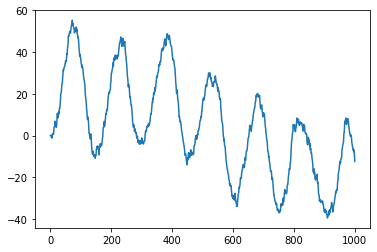

In [ ]:
plt.plot(data)

In [ ]:
def splitter(data, alpha = 0.8):  ### We split the data into 0.8 and 0.2  train test splitting 
  N = len(data)
  N_ = int(alpha*N)
  data_train = data[:N_]
  data_test = data[N_:]
  return data_train, data_test

In [ ]:
data_train, data_test = splitter(data)

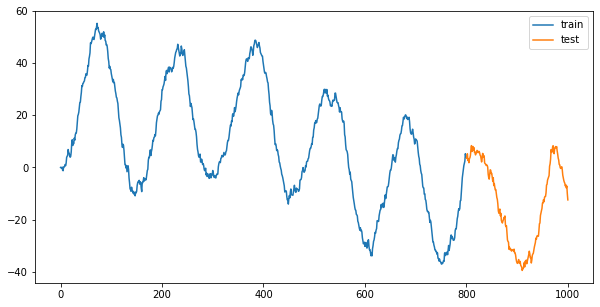

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(data_train, label ="train")
plt.plot(data_test, label = "test")
plt.legend()
plt.show()

In [ ]:
def sliding_window(data:list, window_size:int = 100):
  data = np.array(data)
  X = []
  y = []
  i = 0
  while True:
    try:
      y.append(data[i+window_size])
      X.append(data[i:i+window_size])
      i += 1
    except Exception:
      print(f"We have reached the end of the list! There are total number of {i} rows in your data")
      break
  return np.array(X), np.array(y)

In [ ]:
(X_train, y_train), (X_test, y_test) = sliding_window(data_train), sliding_window(data_test)

We have reached the end of the list! There are total number of 700 rows in your data
We have reached the end of the list! There are total number of 101 rows in your data


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)   #### this gives R2 score, no need to import sklearn's r2score.
y_pred = knn.predict(X_test)

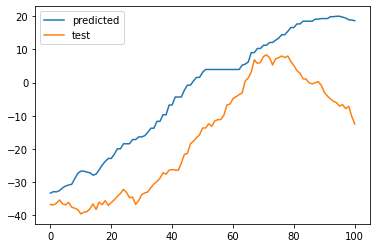

In [ ]:

plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

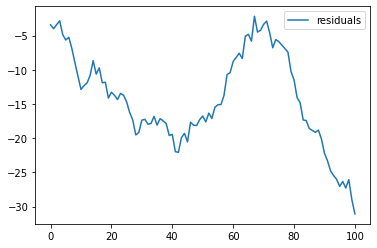

In [ ]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [ ]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-14.109126339155535, 6.849280939506011)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)   #### this give R2 score, no need to import slearn r2score.
y_pred = dt.predict(X_test)

0.9779463700741227


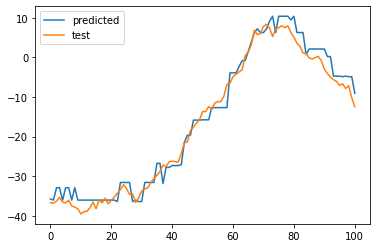

In [ ]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

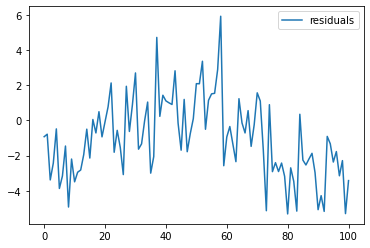

In [ ]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [ ]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-1.0337579905349639, 2.242933023324009)

Neural Networks

In [ ]:

from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (50,25))
ml.fit(X_train, y_train)
score = ml.score(X_test, y_test)
print(score)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = ml.predict(X_test)

0.40990921830146565


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


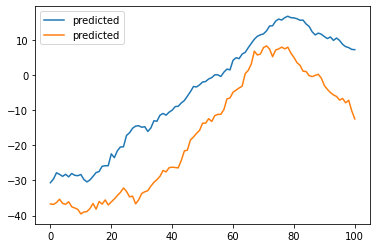

In [ ]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "predicted")
plt.legend()
plt.show()

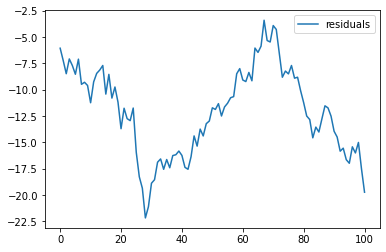

In [ ]:
plt.plot(y_test - y_pred, label = "residuals")
plt.legend()
plt.show()

In [ ]:
np.mean(y_test - y_pred), np.std(y_test - y_pred, ddof = 1)

(-12.031089664052052, 4.158558295153309)

In [ ]:
ml.coefs_

[array([[ 0.08926871, -0.17203678, -0.02698312, ..., -0.0672179 ,
         -0.19284684, -0.11092929],
        [ 0.06509244, -0.16442462, -0.07259952, ...,  0.11964564,
          0.16460939,  0.17068653],
        [ 0.04140927,  0.03552864, -0.18264455, ...,  0.13720437,
          0.1712263 ,  0.1125657 ],
        ...,
        [-0.0979299 , -0.04200872,  0.06270215, ...,  0.00395311,
         -0.18976316, -0.03244681],
        [-0.06486539, -0.27696825, -0.08536192, ..., -0.19910092,
         -0.03769402, -0.04424318],
        [ 0.16268801, -0.06321786, -0.05633286, ...,  0.1384729 ,
         -0.21151202,  0.06532161]]),
 array([[ 0.10640316,  0.29017089, -0.01234592, ..., -0.018682  ,
         -0.20906132,  0.09237592],
        [-0.32119785,  0.04299443, -0.04531007, ...,  0.27834661,
          0.1171839 , -0.21874689],
        [-0.28557747,  0.04806049, -0.05386316, ..., -0.27407378,
         -0.07732392, -0.10128877],
        ...,
        [-0.07387912, -0.06152919, -0.25125679, ...,  

Second Trial

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


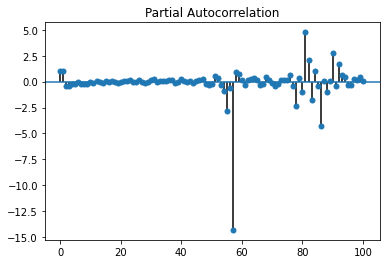

In [ ]:
plot_pacf(data, lags = 100); 

In [ ]:

n = len(data)
alpha = 0.8 ### where to split the data
N = int(n*alpha)
train = data[:N]
test = data[N:]
     

In [ ]:
def sliding_window(data_, lag_size = 50):  #### we picked the 50 here basically by looking at the first picture.
  N = len(data_)
  data = np.array(data_)
  X = []
  y = []
  for i in range(N-lag_size-1):
    X.append(data[i:i+lag_size])
    y.append(data[i+lag_size])
  return np.array(X), np.array(y)

In [ ]:
X_train, y_train = sliding_window(train, 50)
X_test, y_test = sliding_window(test, 50)

In [ ]:
import sklearn  
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1)
knn.fit(X_train, y_train),
knn.score(X_test, y_test)

0.6280614910097548

In [ ]:
from sklearn.neural_network import MLPRegressor 
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9760361548868497

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
splitter = TimeSeriesSplit(n_splits = 5)

In [ ]:
knn_params = {"n_neighbors":range(3,7), "weights":["uniform", "distance"]}  ### parameters of knn
mlp_params = {"hidden_layer_sizes":range(5, 40)}

In [ ]:
cv = GridSearchCV(mlp, param_grid = mlp_params, n_jobs = -1, cv = splitter)
cv.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': range(5, 40)})

In [ ]:
cv.best_params_

{'hidden_layer_sizes': 36}

In [ ]:
mlp_best = MLPRegressor(36) 
mlp_best.fit(X_train, y_train)
mlp_best.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9725947195999396

In [ ]:
cv = GridSearchCV(knn, param_grid = knn_params, n_jobs = -1, cv = splitter)  #### this takes a lot of time... gotta wait.
cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 7),
                         'weights': ['uniform', 'distance']})

In [ ]:
cv.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [ ]:
knn = KNeighborsRegressor(**cv.best_params_) 
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6429094824644059